In [1]:
#-----------------------------------Regresión con una variable (con funciones de librería numpy)
# El dataset viene con varios atributos, pero en el desarollo se selecciona solo una de ellos.

# 1.- Cargo los datos

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Matriz de atributos:", diabetes.data.shape)
print("Matriz de resultados:", diabetes.target.shape)


Matriz de atributos: (442, 10)
Matriz de resultados: (442,)


(array([  2.,   1.,   8.,  10.,  17.,  14.,  17.,  18.,  11.,  20.,  18.,
         18.,   9.,  13.,  10.,   9.,  15.,  11.,  15.,  12.,   6.,   9.,
         10.,  13.,  12.,   7.,   9.,  12.,   5.,   8.,   8.,   5.,   8.,
          8.,   9.,   4.,  11.,   8.,  10.,   9.,   3.,   3.,   3.,   3.,
          5.,   1.,   1.,   1.,   1.,   2.]),
 array([  25.  ,   31.42,   37.84,   44.26,   50.68,   57.1 ,   63.52,
          69.94,   76.36,   82.78,   89.2 ,   95.62,  102.04,  108.46,
         114.88,  121.3 ,  127.72,  134.14,  140.56,  146.98,  153.4 ,
         159.82,  166.24,  172.66,  179.08,  185.5 ,  191.92,  198.34,
         204.76,  211.18,  217.6 ,  224.02,  230.44,  236.86,  243.28,
         249.7 ,  256.12,  262.54,  268.96,  275.38,  281.8 ,  288.22,
         294.64,  301.06,  307.48,  313.9 ,  320.32,  326.74,  333.16,
         339.58,  346.  ]),
 <a list of 50 Patch objects>)

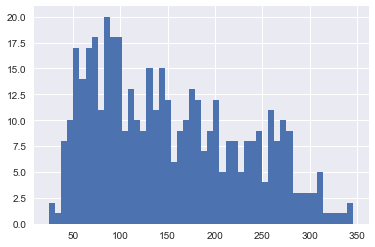

In [3]:
# 2.- Análisis gráfico de los datos

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

plt.hist(diabetes.target,bins=50)

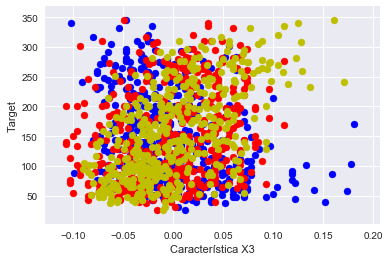

In [7]:
#---------------------------Para inspecionar el dataset
# Código para imprimir en forma de filas y columnas el data del dataset
#for i in range(442):
#    for j in range(10):
#        print(diabetes.data[i,j], end=";")
#    print ()    
# Código para imprimir en forma de filas el target del dataset
#for i in range(442):
#    print(diabetes.target[i])
# diabetes.data[:,6] devuelve la columna completa para la variable X7
###################################################################

plt.scatter(diabetes.data[:,6],diabetes.target,c='b')
plt.xlabel('Característica X7')
plt.ylabel('Target')

plt.scatter(diabetes.data[:,0],diabetes.target,color='r')
plt.xlabel('Característica X1')
plt.ylabel('Target')

plt.scatter(diabetes.data[:,2],diabetes.target,color='y')
plt.xlabel('Característica X3')
plt.ylabel('Target')


In [8]:
# Transformar el dataset original en un DataFrame
import pandas as pd
from pandas import Series,DataFrame
diabetes_df = DataFrame(diabetes.data, columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'])
diabetes_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
diabetes_df['Target'] = diabetes.target
diabetes_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


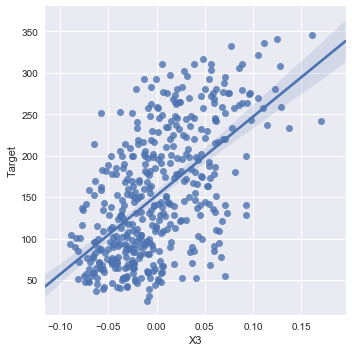

In [10]:
sns.lmplot('X3','Target',data=diabetes_df)

In [11]:
# La pregunta es : ¿Cómo sabemos cuándo la línea es la mejor línea de ajuste?
# Método de los mínimos cuadrados
import numpy as np

X = np.vstack(diabetes_df.X3) # Para apilar como matriz en forma vertical. ELijo solo el atributo X3
X = np.array([[value,1] for value in X]) # Para construir matriz [X 1]
X

array([[array([ 0.06169621]), 1],
       [array([-0.05147406]), 1],
       [array([ 0.04445121]), 1],
       [array([-0.01159501]), 1],
       [array([-0.03638469]), 1],
       [array([-0.04069594]), 1],
       [array([-0.04716281]), 1],
       [array([-0.00189471]), 1],
       [array([ 0.06169621]), 1],
       [array([ 0.03906215]), 1],
       [array([-0.08380842]), 1],
       [array([ 0.01750591]), 1],
       [array([-0.02884001]), 1],
       [array([-0.00189471]), 1],
       [array([-0.02560657]), 1],
       [array([-0.01806189]), 1],
       [array([ 0.04229559]), 1],
       [array([ 0.01211685]), 1],
       [array([-0.0105172]), 1],
       [array([-0.01806189]), 1],
       [array([-0.05686312]), 1],
       [array([-0.02237314]), 1],
       [array([-0.00405033]), 1],
       [array([ 0.06061839]), 1],
       [array([ 0.03582872]), 1],
       [array([-0.01267283]), 1],
       [array([-0.07734155]), 1],
       [array([ 0.05954058]), 1],
       [array([-0.02129532]), 1],
       [array([

In [13]:
Y = diabetes_df.Target
Y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
5       97.0
6      138.0
7       63.0
8      110.0
9      310.0
10     101.0
11      69.0
12     179.0
13     185.0
14     118.0
15     171.0
16     166.0
17     144.0
18      97.0
19     168.0
20      68.0
21      49.0
22      68.0
23     245.0
24     184.0
25     202.0
26     137.0
27      85.0
28     131.0
29     283.0
       ...  
412    261.0
413    113.0
414    131.0
415    174.0
416    257.0
417     55.0
418     84.0
419     42.0
420    146.0
421    212.0
422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, dtype: float64

In [14]:
m, b = np.linalg.lstsq(X, Y)[0] # Devuelve valores m & b para la línea de ajuste de mínimos cuadrados 
                                # (Calcula la solución de mínimos cuadrados a la ecuación Ax = b.)

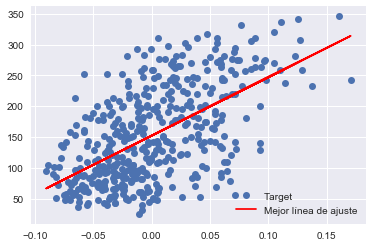

In [15]:
plt.plot(diabetes_df.X3,diabetes_df.Target,'o')
x = diabetes_df.X3
plt.plot(x, m*x + b,'r',label='Mejor línea de ajuste') # Dibuja con la mejor línea de ajuste (introducida en una celda)
plt.legend(loc='lower right')

In [18]:
#----------------------------------------Regresión con múltples variable (con funciones de librería scikitlearn)
# El dataset viene con varios atributos, se hará regresión con todos ellas.

import sklearn
from sklearn.linear_model import LinearRegression

In [19]:
lreg = LinearRegression() # Creo el objeto para regresión lineal

In [20]:
# Recordar cómo tenemos configurado nuestro dataframe
diabetes_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [21]:
# Como el objeto LinearRegression necesita los datos en la forma (X,Y)
# donde X son las variables independientes (atributos) e Y las variables dependientes(etiquetas), ajustamos nuestros dataframes como
# sigue:

X_variables = diabetes_df.drop('Target',1) # puesto que solo necesitamos las X, obviamos la columna Target
Y_objetivo = diabetes_df.Target

In [22]:
lreg.fit(X_variables,Y_objetivo) # pasamos los datos requeridos al objeto regresión e implementamos la regresión

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Vamos a comprobar la intercepción y el número de coeficientes.
print ('The estimated intercept coefficient is %.2f' %lreg.intercept_)
print ('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 152.13
The number of coefficients used was 10


In [ ]:
# lreg ahora una ecuación de una línea recta con 10 coeficienes y un término libre de X, el coeficiente.

In [25]:
coeficientes_df = DataFrame(diabetes_df.columns) # Establecer un DataFrame desde las características
coeficientes_df.columns=['Atributos']
coeficientes_df["Coeficiente Estimado"] = pd.Series(lreg.coef_)
coeficientes_df

,Atributos,Coeficiente Estimado
0,X1,-10.012198
1,X2,-239.819089
2,X3,519.839787
3,X4,324.390428
4,X5,-792.184162
5,X6,476.745838
6,X7,101.044570
7,X8,177.064176
8,X9,751.279321
9,X10,67.625386


In [2]:
# Creación de conjuntos de entrenamiento y validación usando train_test_split
# SciKit Learn tiene una herramienta integrada para seleccionar aleatoriamente muestras de un conjunto de datos
#con fines de entrenamiento y pruebas:

In [32]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_variables,Y_objetivo)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [ ]:
# 3/4 of the original dataset are allocated to train,1/4 to test

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [33]:
# Predecir con el modelo implementado
# Una vez más hacer una regresión lineal, pero sólo en el conjunto de entrenamiento esta vez
lreg = LinearRegression()
lreg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Ahora ejecutamos las predicciones en los conjuntos de entrenamiento y prueba X

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [43]:
# Ahora obtenga el error cuadrático medio (estos valores cambian con cada nueva ejecución train_test_split)
print ("Fit a model X_train, and calculate MSE with Y_train: %.2f" % np.mean((Y_train - pred_train) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" % np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 2785.94
Fit a model X_train, and calculate MSE with X_test and Y_test: 3128.85


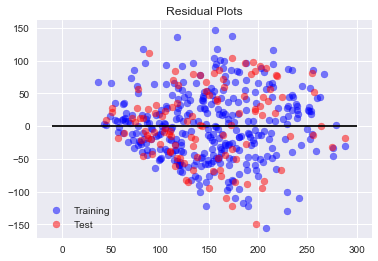

In [45]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train - pred_train),c='b',alpha=0.5)
# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test - pred_test),c='r',alpha=0.5)
# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=300)
# Add Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')